### Setup and Get Data

#### Import libraries

In [1]:
import os
import time
import uuid
import cv2

#### Collect images Using OpenCV

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30 

In [7]:
cap = cv2.VideoCapture(2)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#### Annotate Images using LabelMe

In [8]:
!labelme

2024-04-21 17:04:04,069 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Yash Uday Pisat\.labelmerc


### Review Data and Build Image Loading Function

#### Import TF and Deps

In [11]:
import tensorflow as tf
import json
import numpy as np 
import matplotlib.pyplot as plt

#### Limit GPU Memory Growth

In [13]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [14]:
tf.config.list_physical_devices('GPU')

[]

In [15]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

#### Load Image into TF Data Pipeline

In [39]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [40]:
images.as_numpy_iterator().next()

b'data\\images\\730f83fd-ffef-11ee-b214-48e7da5463b0.jpg'

In [41]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [42]:
images = images.map(load_image)

In [43]:
images.as_numpy_iterator().next()

array([[[215, 229, 212],
        [203, 217, 200],
        [173, 186, 169],
        ...,
        [142, 140, 119],
        [142, 140, 119],
        [142, 140, 119]],

       [[215, 229, 212],
        [201, 215, 198],
        [171, 184, 167],
        ...,
        [142, 140, 119],
        [142, 140, 119],
        [142, 140, 119]],

       [[215, 228, 211],
        [199, 212, 195],
        [168, 179, 163],
        ...,
        [142, 140, 119],
        [142, 140, 119],
        [142, 140, 119]],

       ...,

       [[ 19,  20,  15],
        [ 18,  19,  14],
        [ 19,  20,  15],
        ...,
        [ 20,  19,  14],
        [ 15,  14,   9],
        [ 13,  12,   7]],

       [[ 20,  21,  16],
        [ 19,  20,  15],
        [ 18,  19,  14],
        ...,
        [ 19,  18,  13],
        [ 16,  15,  10],
        [ 14,  13,   8]],

       [[ 24,  25,  20],
        [ 23,  24,  19],
        [ 21,  22,  17],
        ...,
        [ 19,  18,  13],
        [ 16,  15,  10],
        [ 15,  14,   9]]

In [44]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

#### View raw images with matplotlib

In [45]:
image_generator = images.batch(4).as_numpy_iterator()

In [46]:
plot_images = image_generator.next()

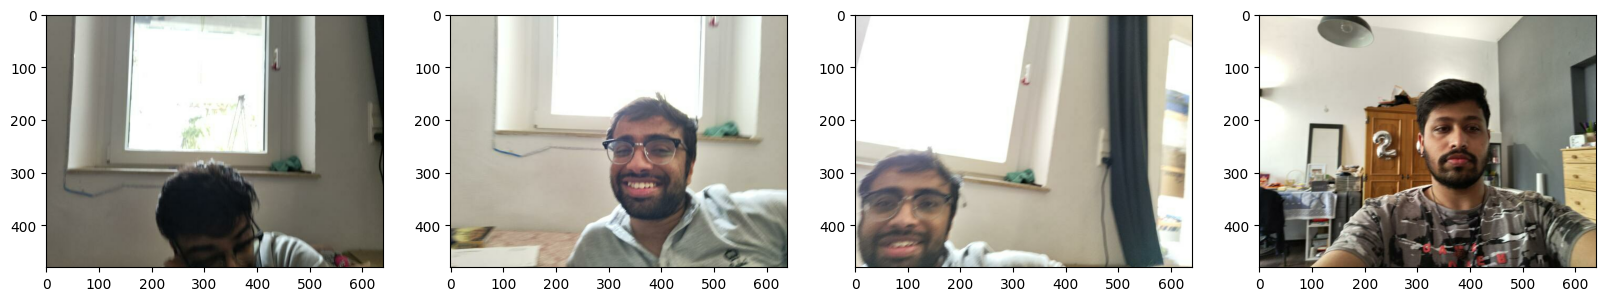

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### Partition Unaugmented Data

#### LEts see tomorrow